In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from citipy import citipy

# Import the requests library.

import requests

# Import the time library and the datetime module from the datetime library 

import time 

from datetime import datetime


# Import the API key.

from Config import weather_api_key

# Import linregress

from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)


lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = lat_lngs

In [4]:
# Create a list for holding the cities.

cities = []


# Identify the nearest city for each latitude and longitude combination.


for coordinate in coordinates:
    
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)



595

In [5]:
requests.__version__

'2.28.1'

In [6]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=295fd0e28a66265b757071d5c5a859c1


In [7]:
# Create an empty list to hold the weather data.

# city_data = []

# Print the beginning of the logging.

# print("Beginning Data Retrieval     ")

# print("-----------------------------")


# Create counters.

# record_count = 1

# set_count = 1

In [8]:
#     # Create an empty list to hold the weather data.

#     city_data = []

#     # Print the beginning of the logging.

#     print("Beginning Data Retrieval     ")

#     print("-----------------------------")


#     # Create counters.

#     record_count = 1

#     set_count = 1


#     # Loop through all the cities in our list.

#     for i, city in enumerate(cities):


#         # Group cities in sets of 50 for logging purposes.

#         if (i % 50 == 0 and i >= 50):

#             set_count += 1

#             record_count = 1

#             time.sleep(60)


#             # Create endpoint URL with each city.

#             city_url = url + "&q=" + city.replace(" ","+")


#         # Log the URL, record, and set numbers and the city.


#         print(f"Processing Record {record_count} of Set {set_count} | {city}")


#         # Add 1 to the record count.


#         record_count += 1


#         # Run an API request for each of the cities.


#         try:

#             # Parse the JSON and retrieve data.

#             city_weather = requests.get(city_url).json()

#             # Parse out the needed data.

#             city_lat = city_weather["coord"]["lat"]


#             city_lng = city_weather["coord"]["lon"]


#             city_max_temp = city_weather["main"]["temp_max"]


#             city_humidity = city_weather["main"]["humidity"]


#             city_clouds = city_weather["clouds"]["all"]


#             city_wind = city_weather["wind"]["speed"]


#             city_country = city_weather["sys"]["country"]


#             # Convert the date to ISO standard.


#             #city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')


#             # Append the city information into city_data list.

#             city_weather_description = city_weather["weather"][0]["description"]

#             city_data.append({"City": city.title(), "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, "Current Description":city_weather_description, "Humidity": city_humidity,

#                               "Cloudiness": city_clouds, "Wind Speed": city_wind, "Country": city_country})


#         # If an error is experienced, skip the city.

#         except:

#             print("City not found. Skipping...")

#             pass



#     # Indicate that Data Loading is complete.

#     print("-----------------------------")


#     print("Data Retrieval Complete      ")


#     print("-----------------------------")


In [9]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahibadhoo
Processing Record 2 of Set 1 | rocha
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | port hedland
Processing Record 8 of Set 1 | coquimbo
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | codrington
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | ambodifototra
City not found. Skipping...
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | martinsville
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | ancud
Processi

Processing Record 32 of Set 4 | flin flon
Processing Record 33 of Set 4 | sinnamary
Processing Record 34 of Set 4 | ambanja
Processing Record 35 of Set 4 | parana
Processing Record 36 of Set 4 | jardim
Processing Record 37 of Set 4 | bilaspur
Processing Record 38 of Set 4 | aklavik
Processing Record 39 of Set 4 | akdepe
Processing Record 40 of Set 4 | safford
Processing Record 41 of Set 4 | yellowknife
Processing Record 42 of Set 4 | payson
Processing Record 43 of Set 4 | ewa beach
Processing Record 44 of Set 4 | talnakh
Processing Record 45 of Set 4 | kaputa
Processing Record 46 of Set 4 | darovskoy
Processing Record 47 of Set 4 | yumen
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | flinders
Processing Record 50 of Set 4 | fort collins
Processing Record 1 of Set 5 | lokosovo
Processing Record 2 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 5 | fairbanks
Processing Record 4 of Set 5 | madison
Processing Record 5 of Set 5 | georgetow

Processing Record 26 of Set 8 | takoradi
Processing Record 27 of Set 8 | diffa
Processing Record 28 of Set 8 | bend
Processing Record 29 of Set 8 | waddan
Processing Record 30 of Set 8 | sambava
Processing Record 31 of Set 8 | quesnel
Processing Record 32 of Set 8 | asfi
Processing Record 33 of Set 8 | taoudenni
Processing Record 34 of Set 8 | luwuk
Processing Record 35 of Set 8 | komsomolskiy
Processing Record 36 of Set 8 | borshchiv
Processing Record 37 of Set 8 | araouane
Processing Record 38 of Set 8 | wasilla
Processing Record 39 of Set 8 | ardistan
City not found. Skipping...
Processing Record 40 of Set 8 | cayenne
Processing Record 41 of Set 8 | oranjemund
Processing Record 42 of Set 8 | whittlesea
Processing Record 43 of Set 8 | sokyryany
Processing Record 44 of Set 8 | marathopolis
City not found. Skipping...
Processing Record 45 of Set 8 | chazuta
Processing Record 46 of Set 8 | wahiawa
Processing Record 47 of Set 8 | veraval
Processing Record 48 of Set 8 | mount pleasant
Pro

Processing Record 15 of Set 12 | mamou
Processing Record 16 of Set 12 | chimbote
Processing Record 17 of Set 12 | elista
Processing Record 18 of Set 12 | qasigiannguit
Processing Record 19 of Set 12 | labuan
Processing Record 20 of Set 12 | boa vista
Processing Record 21 of Set 12 | ust-kuyga
Processing Record 22 of Set 12 | sobolevo
Processing Record 23 of Set 12 | nahrin
Processing Record 24 of Set 12 | te anau
Processing Record 25 of Set 12 | maltahohe
Processing Record 26 of Set 12 | manbij
Processing Record 27 of Set 12 | ornskoldsvik
Processing Record 28 of Set 12 | kovdor
Processing Record 29 of Set 12 | imbituba
Processing Record 30 of Set 12 | polunochnoye
Processing Record 31 of Set 12 | ambilobe
Processing Record 32 of Set 12 | yar-sale
Processing Record 33 of Set 12 | abu dhabi
Processing Record 34 of Set 12 | saint-louis
Processing Record 35 of Set 12 | sur
Processing Record 36 of Set 12 | coahuayana
Processing Record 37 of Set 12 | acapulco
Processing Record 38 of Set 12 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahibadhoo,3.7833,72.9667,81.68,78,100,14.18,MV,2022-08-09 01:21:58
1,Rocha,-34.4833,-54.3333,44.91,87,95,3.09,UY,2022-08-09 01:21:59
2,Punta Arenas,-53.1500,-70.9167,37.51,81,100,9.22,CL,2022-08-09 01:18:20
3,Mataura,-46.1927,168.8643,44.08,59,6,8.12,NZ,2022-08-09 01:21:59
4,East London,-33.0153,27.9116,61.21,80,39,2.91,ZA,2022-08-09 01:20:17
5,Ushuaia,-54.8000,-68.3000,38.86,52,75,5.75,AR,2022-08-09 01:21:39
6,Port Hedland,-20.3167,118.5667,73.45,28,9,6.91,AU,2022-08-09 01:19:53
7,Coquimbo,-29.9533,-71.3436,55.13,71,0,3.44,CL,2022-08-09 01:22:00
8,Arraial Do Cabo,-22.9661,-42.0278,70.74,86,100,6.80,BR,2022-08-09 01:22:00
9,Busselton,-33.6500,115.3333,49.42,77,100,16.08,AU,2022-08-09 01:22:00


In [11]:
# reorder the columns 

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]


city_data_df = city_data_df[new_column_order]

In [12]:
# Create the output file (CSV).


output_data_file = "weather_data/cities.csv"


# Export the City_Data into a CSV.


city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.


lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

In [14]:
# Get today's date in seconds.

today = time.strftime("%x")/...

today

'08/08/22'

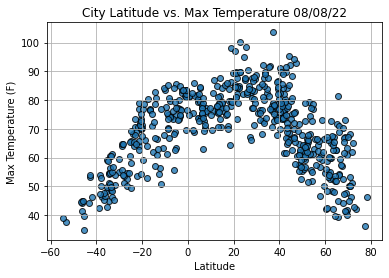

In [15]:
# Build the scatter plot for latitude vs. max temperature.


plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.2

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))


plt.ylabel("Max Temperature (F)")


plt.xlabel("Latitude")


plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig1.png")


# Show plot.

plt.show()

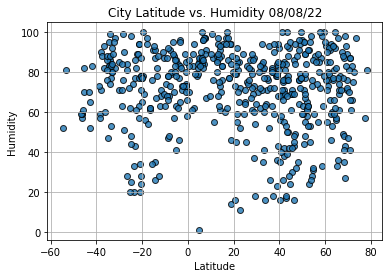

In [16]:
# Build the scatter plot for latitude vs. max temperature.


plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.2

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))


plt.ylabel("Humidity")


plt.xlabel("Latitude")


plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig2.png")


# Show plot.

plt.show()

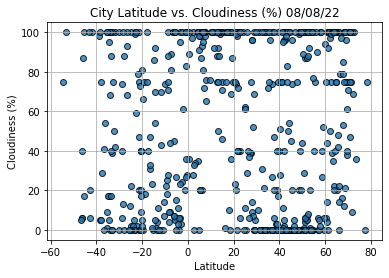

In [17]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

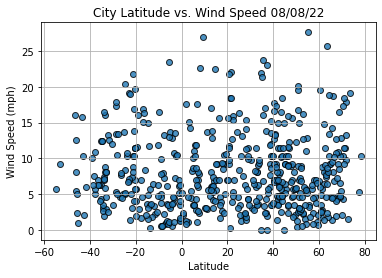

In [18]:
# Build the scatter plots for latitude vs. wind speed.


plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")



# Incorporate the other graph properties.


plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")


plt.xlabel("Latitude")
plt.grid(True)

 
# Save the figure.


plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [35]:
# Create a function to create perform linear regression on the weather data

# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    
    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()
    
    print(r_value)

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahibadhoo,MV,2022-08-09 01:21:58,3.7833,72.9667,81.68,78,100,14.18
15,Martinsville,US,2022-08-09 01:22:03,36.6915,-79.8725,77.18,63,74,4.38
17,Albany,US,2022-08-09 01:20:33,42.6001,-73.9662,80.28,81,96,7.85
19,Qaanaaq,GL,2022-08-09 01:22:05,77.4840,-69.3632,36.28,57,0,5.32
20,Aginskoye,RU,2022-08-09 01:22:05,51.1000,114.5300,62.69,55,87,16.82
...,...,...,...,...,...,...,...,...,...
539,Berlevag,NO,2022-08-09 01:37:08,70.8578,29.0864,50.00,87,100,11.50
540,Hami,CN,2022-08-09 01:36:36,42.8000,93.4500,91.47,18,0,5.99
541,Sibolga,ID,2022-08-09 01:37:09,1.7427,98.7792,82.51,61,97,0.85
542,Zyryanka,RU,2022-08-09 01:37:09,65.7500,150.8500,81.46,36,48,4.41


In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahibadhoo,MV,2022-08-09 01:21:58,3.7833,72.9667,81.68,78,100,14.18
15,Martinsville,US,2022-08-09 01:22:03,36.6915,-79.8725,77.18,63,74,4.38
17,Albany,US,2022-08-09 01:20:33,42.6001,-73.9662,80.28,81,96,7.85
19,Qaanaaq,GL,2022-08-09 01:22:05,77.4840,-69.3632,36.28,57,0,5.32
20,Aginskoye,RU,2022-08-09 01:22:05,51.1000,114.5300,62.69,55,87,16.82


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

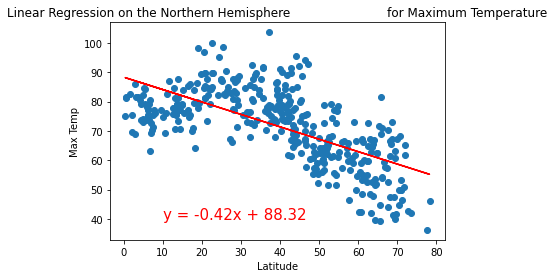

-0.6563088620460936


In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

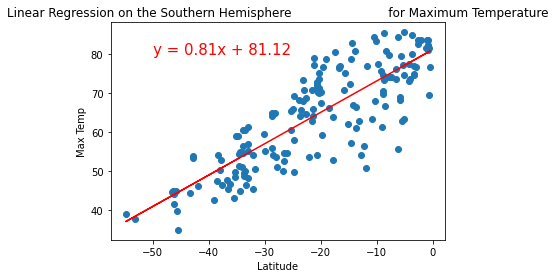

0.8367483959402188


In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))


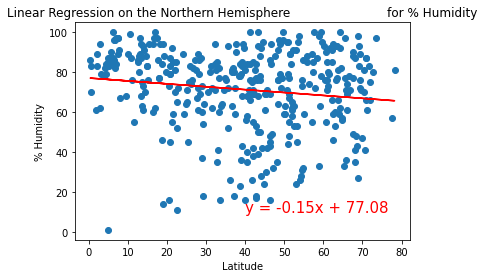

-0.14219618074640952


In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

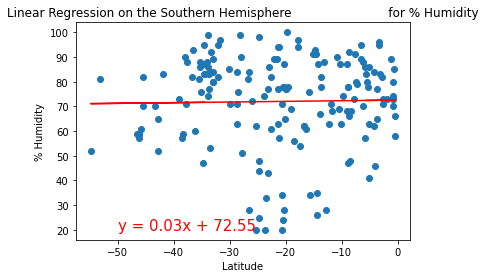

0.018867159944482237


In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

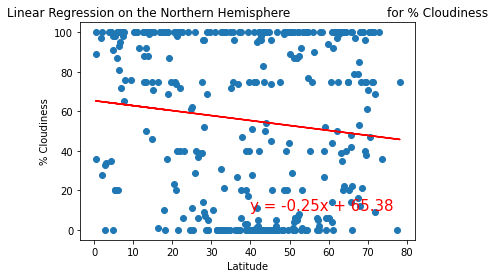

-0.12023303455243194


In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

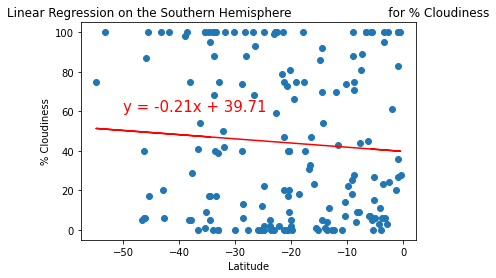

-0.07192952263962205


In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

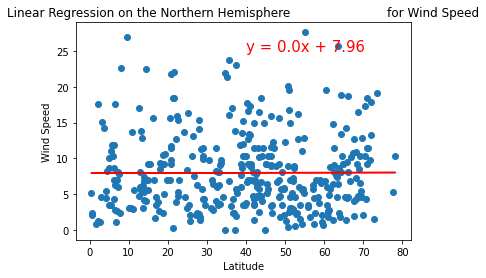

0.0028209982768612712


In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

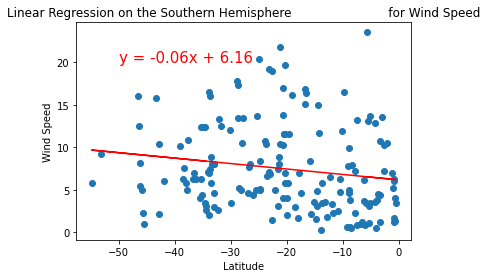

-0.16618680454317764


In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))